In [1]:
%load_ext autoreload
%autoreload 2
%reload_ext autoreload
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels as sm
import seaborn as sns
import re
import attila_utils

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [2]:
fpath = '../../resources/lipid-data-groups.csv'
group_levels = pd.read_csv(fpath, header=[0, 1], index_col=0)
group_levels.head()

ChAc 1                        ChAc 2                        ChAc 3  \
          CN   Putamen     DLPFC        CN   Putamen     DLPFC        CN   
FC  74.76526  85.28993  77.60351  62.75982  84.16329  71.32924  85.05140   
CE   3.11056   1.05517   2.23171   2.71915   0.59530   1.01722   1.20094   
AC   0.21767   0.12956   0.17994   0.24392   0.06999   0.14556   0.08813   
MG   0.06494   0.02671   0.02192   0.08738   0.02618   0.03270   0.02797   
DG   0.61273   0.74028   0.50084   0.68331   0.91864   0.45451   0.53963   

                       Control 1  ... Control 4 Control 5                      \
     Putamen     DLPFC        CN  ...     DLPFC        CN   Putamen     DLPFC   
FC  77.70036  79.20319  86.01249  ...  83.43361  72.05994  80.88242  74.07980   
CE   2.43606   1.17550   0.59214  ...   0.38238   3.70715   2.36220   1.27923   
AC   0.18725   0.08959   0.04726  ...   0.04146   0.17098   0.10491   0.24669   
MG   0.06788   0.03000   0.02171  ...   0.02556   0.03219   0.02436   0.05155   
DG   0.56864   0.43298   0.93269  ...   0.31929   0.60878   0.42807   0.70727   

   Control 6                        ChAc 4                      
          CN   Putamen     DLPFC        CN   Putamen     DLPFC  
FC  70.35621  73.44837  76.29813  85.80184  80.74627  66.70411  
CE   1.51144   1.26920   0.89684   1.41653   1.72224   2.46848  
AC   0.05078   0.07467   0.07863   0.03312   0.03876   0.09821  
MG   0.02505   0.02184   0.02339   0.01612   0.03198   0.02808  
DG   0.44212   0.34882   0.38706   0.47798   0.52203   0.45474  

[5 rows x 30 columns]

In [3]:
# import data
fpath = '../../resources/lipid-data-species.csv'
species_levels = pd.read_csv(fpath, header=[0, 1], index_col=0)
# add species group
ix0 = [re.sub('^(\S+)\s.*$', '\\1', s) for s in species_levels.index]
species_levels.index = pd.MultiIndex.from_arrays([ix0, species_levels.index])
# tick locations and labels for heatmap
g, ix = np.unique(ix0, return_index=True)
s = pd.Series(ix, index=g).sort_values() - 0.5
s1 = pd.Series(s.to_list() + [len(species_levels)], index=['start'] + s.index.to_list())
s1 = s1.rolling(window=2).mean().drop('start')
ticks = pd.concat([s.to_frame('tick_loc'), s1.to_frame('label_loc')], axis=1)
group_info = pd.DataFrame({'ticks': ix}, index=g).sort_values('ticks')
# Reorder columns to group Control and ChAc subjects together
c0 = ['Control ' + str(i + 1) for i in range(6)] + ['ChAc ' + str(i + 1) for i in range(4)]
c1 = ['CN', 'Putamen', 'DLPFC']
species_levels = species_levels.reindex(columns=pd.MultiIndex.from_product([c0, c1]))

In [4]:
def normalize(data):
    Min = data.min(axis=1)
    Max = data.max(axis=1)
    val = data.apply(lambda x: (x - Min) / (Max - Min), axis=0)
    return(val)

normalize(species_levels)

Control 1                     Control 2                      \
                       CN   Putamen     DLPFC        CN   Putamen     DLPFC   
FC   FC          0.959980  0.792806  0.591080  0.649502  0.914754  0.504857   
CE   CE 16:0     0.000000  0.190895  0.059234  0.167356  0.061562  0.036472   
     CE 16:1     0.016924  0.159964  0.003640  0.254777  0.176342  0.021838   
     CE 18:0     0.093706  0.260839  0.084615  0.308392  0.235664  0.007692   
     CE 18:1     0.071660  0.266588  0.026748  0.343556  0.229535  0.011259   
...                   ...       ...       ...       ...       ...       ...   
NSer NSer 16:1   0.316637  0.341682  0.617174  0.209302  0.254025  0.116279   
     NSer 18:0   0.390271  0.580317  1.000000  0.266968  0.360860  0.210407   
     NSer 18:1   0.739910  0.649664  0.831278  0.307735  0.582960  0.198991   
     NSer 20:4   0.179310  0.841379  0.351724  0.793103  0.558621  0.751724   
     NSer 22:6   0.017391  0.339130  0.200000  0.721739  0.191304  1.000000   

                Control 3                     Control 4  ...    ChAc 1  \
                       CN   Putamen     DLPFC        CN  ...     DLPFC   
FC   FC          1.000000  0.495568  0.476621  0.442563  ...  0.612818   
CE   CE 16:0     0.065701  0.682618  0.181324  0.261252  ...  1.000000   
     CE 16:1     0.368153  0.981438  0.428753  0.117925  ...  0.199272   
     CE 18:0     0.066434  0.767133  0.075524  0.141259  ...  0.202098   
     CE 18:1     0.223853  1.000000  0.346355  0.265634  ...  0.433172   
...                   ...       ...       ...       ...  ...       ...   
NSer NSer 16:1   1.000000  0.284436  0.574240  0.033989  ...  0.000000   
     NSer 18:0   0.383484  0.251131  0.300905  0.153846  ...  0.158371   
     NSer 18:1   1.000000  0.344731  0.553251  0.096973  ...  0.105381   
     NSer 20:4   0.158621  0.744828  0.800000  0.393103  ...  0.234483   
     NSer 22:6   0.052174  0.626087  0.973913  0.252174  ...  0.286957   

                   ChAc 2                        ChAc 3                      \
                       CN   Putamen     DLPFC        CN   Putamen     DLPFC   
FC   FC          0.000000  0.883636  0.353786  0.920302  0.616816  0.678860   
CE   CE 16:0     0.879721  0.008795  0.254009  0.240041  0.386963  0.193482   
     CE 16:1     0.788717  0.006187  0.026934  0.068790  0.257507  0.043494   
     CE 18:0     0.720979  0.027273  0.073427  0.134266  0.250350  0.000000   
     CE 18:1     0.922431  0.062246  0.124015  0.150431  0.322012  0.100460   
...                   ...       ...       ...       ...       ...       ...   
NSer NSer 16:1   0.078712  0.533095  0.041145  0.221825  0.089445  0.157424   
     NSer 18:0   0.064480  0.510181  0.134615  0.114253  0.000000  0.124434   
     NSer 18:1   0.065022  0.845852  0.122197  0.329596  0.000000  0.158072   
     NSer 20:4   0.400000  0.000000  0.682759  0.027586  0.275862  0.144828   
     NSer 22:6   0.200000  0.000000  0.739130  0.000000  0.130435  0.182609   

                   ChAc 4                      
                       CN   Putamen     DLPFC  
FC   FC          0.951283  0.742565  0.162839  
CE   CE 16:0     0.271081  0.394465  0.783756  
     CE 16:1     0.102093  0.058235  0.127934  
     CE 18:0     0.222378  0.216783  0.420979  
     CE 18:1     0.262524  0.279112  0.420233  
...                   ...       ...       ...  
NSer NSer 16:1   0.191413  0.348837  0.042934  
     NSer 18:0   0.220588  0.280543  0.233032  
     NSer 18:1   0.414238  0.420404  0.208520  
     NSer 20:4   0.317241  0.627586  1.000000  
     NSer 22:6   0.069565  0.121739  0.817391  

[593 rows x 30 columns]

['named-figure/single-panel-heatmap-CN.png',
 'named-figure/single-panel-heatmap-CN.pdf']

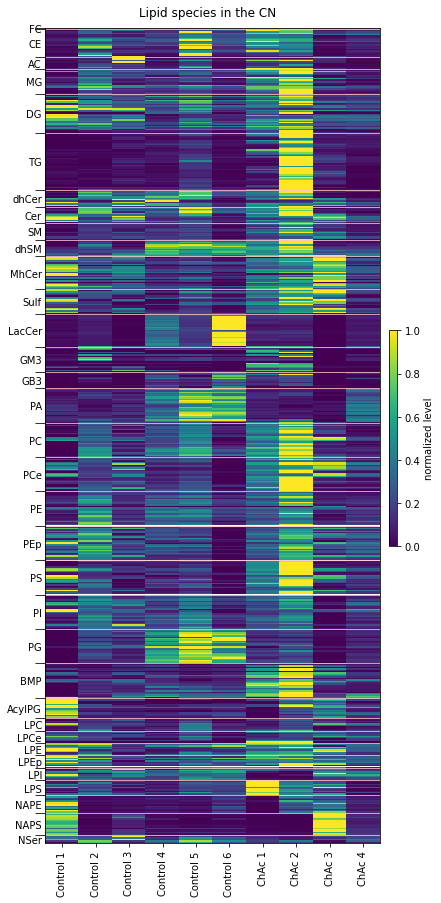

In [5]:
def single_panel_heatmap(region='CN', data=normalize(species_levels), ticks=ticks, cmap='viridis', gridcolor='pink'):
    fig, ax = plt.subplots(figsize=(6, 15))
    ax.imshow(data.xs(region, axis=1, level=1), aspect='auto', cmap=cmap, interpolation='none')
    ax.set_yticks(ticks['tick_loc'])
    ax.set_yticklabels('')
    ax.set_yticks(ticks['label_loc'], minor=True)
    ax.set_yticklabels(ticks.index, minor=True)
    ax.tick_params(axis='y', which='minor', length=0)
    ax.tick_params(axis='y', which='major', length=10)
    ax.set_xticks(range(len(c0)))
    ax.set_xticklabels(data.xs(region, axis=1, level=1).columns, rotation=90)
    ax.grid(True, which='major', axis='y', color=gridcolor)
    fig.suptitle('Lipid species in the ' + region, y=0.9)
    cm = plt.cm.ScalarMappable(cmap=cmap)
    cm.set_clim(vmin=0, vmax=1)
    cb_ax = fig.add_axes([0.92, 0.4, 0.02, 0.2])
    fig.colorbar(cm, cax=cb_ax, label='normalized level')
    return((fig, ax))

fig, ax = single_panel_heatmap()
attila_utils.savefig(fig, 'single-panel-heatmap-CN')

['named-figure/single-panel-heatmap-Putamen.png',
 'named-figure/single-panel-heatmap-Putamen.pdf']

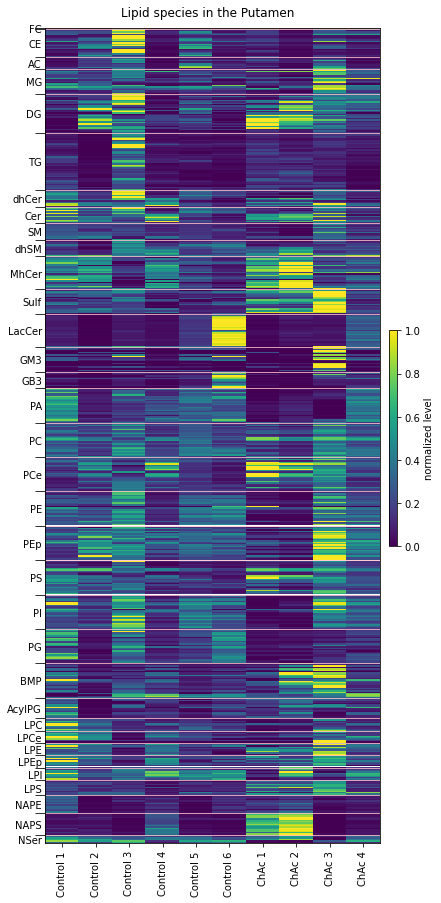

In [6]:
fig, ax = single_panel_heatmap(region='Putamen')
attila_utils.savefig(fig, 'single-panel-heatmap-Putamen')

['named-figure/single-panel-heatmap-DLPFC.png',
 'named-figure/single-panel-heatmap-DLPFC.pdf']

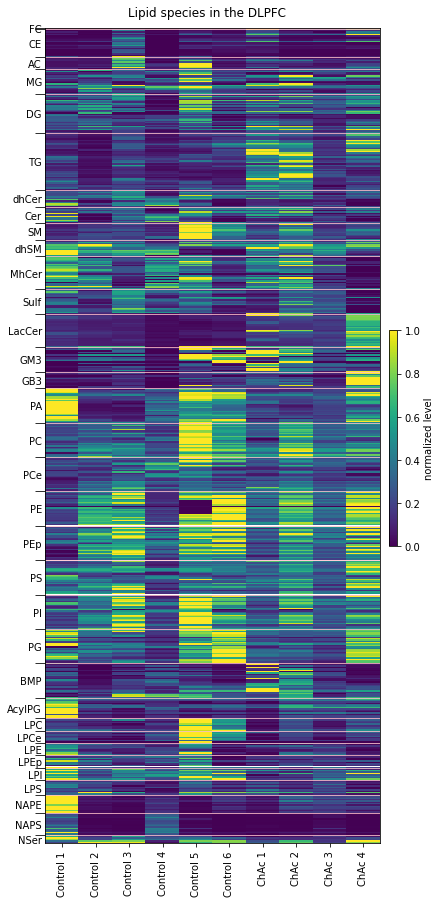

In [7]:
fig, ax = single_panel_heatmap(region='DLPFC')
attila_utils.savefig(fig, 'single-panel-heatmap-DLPFC')

In [8]:
#sns.clustermap(group_levels.xs('CN', axis=1, level=1), standard_scale=0)

In [9]:
%connect_info

{
  "shell_port": 50026,
  "iopub_port": 50027,
  "stdin_port": 50028,
  "control_port": 50030,
  "hb_port": 50029,
  "ip": "127.0.0.1",
  "key": "0c9e3699-08ac330a2cb64037edd038e8",
  "transport": "tcp",
  "signature_scheme": "hmac-sha256",
  "kernel_name": ""
}

Paste the above JSON into a file, and connect with:
    $> jupyter <app> --existing <file>
or, if you are local, you can connect with just:
    $> jupyter <app> --existing kernel-a8a55b98-e1ac-4cbf-99c1-a9cad3d41585.json
or even just:
    $> jupyter <app> --existing
if this is the most recent Jupyter kernel you have started.
